In [7]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#importing data
data=pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.sex.replace(["female","male"],[0,1],inplace=True)

In [10]:
data.smoker.replace(["yes","no"],[0,1],inplace=True)

In [11]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
data.region.replace(['southwest', 'southeast', 'northwest', 'northeast'],[0,1,2,3],inplace=True)

In [13]:
#Describing data
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.795217,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [14]:
#shape and size of data
print("shape of data is:",data.shape)
print("size of data is:",data.size)

shape of data is: (1338, 7)
size of data is: 9366


In [15]:
#information regarding the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [16]:
#checking for the nan values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [42]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,-0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,-0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,-0.007673,-0.016569,0.067998
smoker,0.025019,-0.076185,-0.003750,-0.007673,1.000000,-0.002181,-0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,-0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,-0.787251,0.006208,1.000000


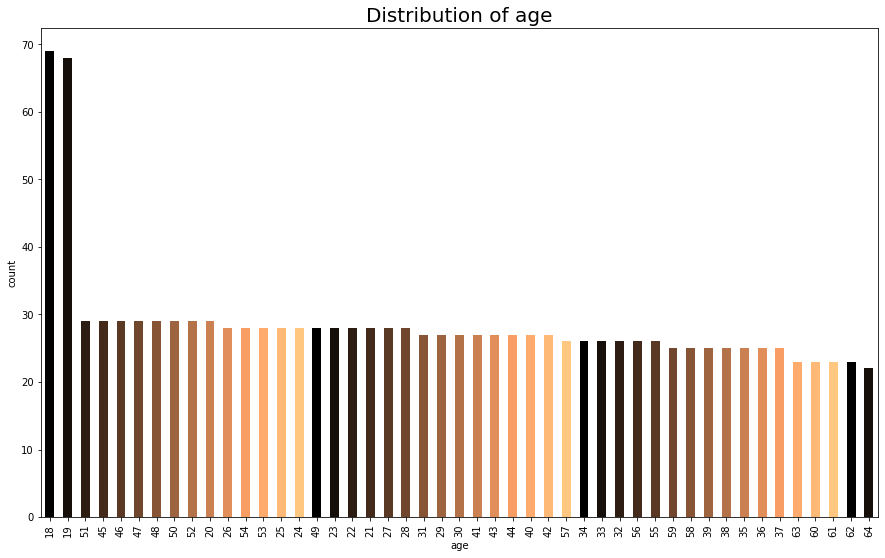

In [20]:
color = plt.cm.copper(np.linspace(0, 1, 15))
data['age'].value_counts().plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of age', fontsize = 20)
plt.xlabel('age')
plt.ylabel('count')
plt.show()

In [21]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [22]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age            24.000000
sex             1.000000
bmi             8.397500
children        2.000000
smoker          0.000000
region          1.000000
charges     11899.625365
dtype: float64


In [23]:
df = data[~((data< (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(1055, 7)

In [24]:
X=df.iloc[:,1:]
y=df.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=10)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
lr.intercept_

-1.6370904631912708e-11

In [40]:
lr.coef_

array([ 1.34177834e-13,  4.79283280e-13,  1.80515535e-13, -9.48676901e-20,
       -6.63178090e-13,  1.00000000e+00])

In [30]:
y=lr.predict(X_test)


In [34]:
#training accuracy
R_sqr=lr.score(X_train,y_train)
R_sqr

1.0

In [35]:
#testing accuracy
R_sqr=lr.score(X_test,y_test)
R_sqr

1.0

In [36]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [37]:
mod=sm.OLS(y_train,X_train)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.467e+32
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:26:09   Log-Likelihood:                 18234.
No. Observations:                 738   AIC:                        -3.646e+04
Df Residuals:                     732   BIC:                        -3.643e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sex        -1.386e-12   3.33e-13     -4.157      0.0

In [38]:
y_pred = lr.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted Values" ])
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real Values"])
pd.concat([y_test_df , y_pred_df] , axis=1)

,Real Values,Predicted Values
0,8605.36150,8605.36150
1,5934.37980,5934.37980
2,2207.69745,2207.69745
3,3847.67400,3847.67400
4,7209.49180,7209.49180
...,...,...
312,14418.28040,14418.28040
313,8827.20990,8827.20990
314,9644.25250,9644.25250
315,11165.41765,11165.41765
